## Shallow Networks

> X -> inputs

> Y -> outputs

> W -> weights (W1,W2)/(fst layer, snd layer)

> b -> biases (b1,b2)/(fst layer, snd layer)

> a -> prediction 

> L -> Loss funtion

In [217]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import math
import sys

In [218]:
def read_asc_data(filename):    
    f= open(filename,'r') 
    tmp_str=f.readline()
    tmp_arr=tmp_str[:-1].split(' ')
    N=int(tmp_arr[0]);n_row=int(tmp_arr[1]);n_col=int(tmp_arr[2])
    data=np.zeros([N,n_row*n_col+1])
    for n in range(N):
        tmp_str=f.readline()
        tmp_arr=tmp_str[:-1].split(' ')       
        for i in range(n_row*n_col+1):
            data[n][i]=int(tmp_arr[i])
    f.close() 
    return N,n_row,n_col,data

In [219]:
def plot_data(row,col,n_row,n_col,data):
    fig=plt.figure(figsize=(row,col))
    for n in range(1, row*col +1):
        img=np.reshape(data[n-1][:-1],(n_row,n_col))
        fig.add_subplot(row, col, n)
        plt.imshow(img,interpolation='none',cmap='binary')
    plt.show()

In [220]:
def plot_tagged_data(row,col,n_row,n_col,X,Y,parameters): 
    fig=plt.figure(figsize=(row,col))
    
    l = predict(parameters,X)
    print(l.shape)
    print(l)
    
    for n in range(row*col):
        img=np.reshape(X[n],(n_row,n_col))
        fig.add_subplot(row, col, n+1)
   
        if(l[n]>0.5):
            plt.imshow(img,interpolation='none',cmap='RdPu')
        else:
            plt.imshow(img,interpolation='none',cmap='cool')               
    plt.show()

In [221]:
def cost(predict,true_labels):
    
    m = len(predict)
    
    Loss = 1/(2*m) + np.sum((predict-true_labels)**2)

    return Loss

In [222]:
def build_shallowNet(input_shape,output_shape, units):
    
    #m imagens, n pixeis
    (m,n) = input_shape
    (_,o) = output_shape
    u = units
    
    W1 = np.random.randn(n,u)*0.01 #(m,n) * (n,u) = (m,u)
    b1 = np.zeros(shape=(1,u))
    
    
    W2 = np.random.rand(u,o)*0.01  #(m,u) * (u,o) = (m,o)
    b2 = np.zeros(shape=(1,o)) 
    
    #print("W1 shape = " + str(W1.shape))
    
    #print("W2 shape = " + str(W2.shape))
    
    return W1,b1,W2,b2
    

In [223]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z));
    return s;

In [229]:
# X -> Linear -> Sigmoid -> Linear -> Sigmoid
def feed_forward(X,W1,b1,W2,b2):
    
    Z1 = np.dot(X,W1) + b1
    A1 = np.tanh(Z1)
    
    Z2 = np.dot(A1,W2) + b2
    A2 = sigmoid(Z2)
    
    cache = (Z1,A1,Z2,A2)
    parameters = (W1,b1,W2,b2)
    
    return parameters,cache,A2

In [230]:
def back_propagation(parameters,cache,Yt):
    
    (Z1,A1,Z2,A2) = cache
    (W1,b1,W2,b2) = parameters
    
    m = (A2.shape[1])#número de imagens
    
    #dW2 ou dW1 significa que o gradiente da função custo em relação ao determinado peso, W1 ou W2
    
    dW2 = np.dot(  (((1/m) * (A2-Yt)) * sigmoid(1-sigmoid(Z2))).T , A1 )
    dW2 = dW2.T
    
    #print(dW2.shape)
    

    dW1 = np.dot((np.dot( (((1/m) * (A2-Yt)) * sigmoid(1-sigmoid(Z2))), W2.T ) *  sigmoid(sigmoid(Z1))).T, Xt)
    dW1 = dW1.T
    
    #print(dW1.shape)
    
    return dW1,dW2

In [231]:
def update(dW1,dW2,parameters,lr):
    (W1,b1,W2,b2) = parameters
    W1 = W1 - lr * dW1
    W2 = W2 - lr * dW2
    
    parameters = (W1,b1,W2,b2)
    
    return parameters

In [232]:
def predict(parameters,X):
    (W1,b1,W2,b2) = parameters
    parameters,cache,A2 = feed_forward(Xt,W1,b1,W2,b2)
    return A2

In [237]:
#=========== Setting dataset ================
#N,n_row,n_col,data=read_asc_data('./line600.txt')
N,n_row,n_col,data=read_asc_data('./square_circle.txt')
print('find %d images of %d X %d pixels' % (N,n_row,n_col))

#plot_data(10,10,n_row,n_col,data)
Nt=int(N*0.8);I=n_row*n_col; #split training vs test sets
Xt=data[:Nt,:-1];Yt=data[:Nt,-1]
Yt = Yt.reshape(len(Yt),1)
np.place(Yt, Yt!=1, [0])


#=========== Shallow Net code ===============
epochs = 100000
previous_loss = 6000

W1,b1,W2,b2 = build_shallowNet(Xt.shape,Yt.shape, 64) #initialization of weights

for epoch in range(epochs):

    parameters,cache,A2 = feed_forward(Xt,W1,b1,W2,b2)#propagation

    loss = cost(A2,Yt)#cost/loss function
    
    if(epoch % 100 == 0):
        print("Loss function of = " + str(loss))
        if(previous_loss < loss):
            break
        previous_loss = loss
    
    dW1,dW2 = back_propagation(parameters,cache,Yt)#back propagation, weights update
    
    parameters = update(dW1,dW2,parameters,lr = 0.0001)
    
    W1,b1,W2,b2 = parameters


find 1500 images of 12 X 12 pixels
Loss function of = 300.0474644177084
Loss function of = 290.97658314781836
Loss function of = 273.8700715328008
Loss function of = 268.9005520089931
Loss function of = 262.18809798755
Loss function of = 252.95539733466998
Loss function of = 241.17180976740846
Loss function of = 228.36649903635887
Loss function of = 216.75025297737452
Loss function of = 207.29414477244657
Loss function of = 199.76584467573116
Loss function of = 193.6458495756306
Loss function of = 188.51728110031652
Loss function of = 184.10432324650176
Loss function of = 180.23847457814665
Loss function of = 176.82369453691192
Loss function of = 173.80899770622779
Loss function of = 171.16829414412388
Loss function of = 168.8847534474955
Loss function of = 166.93618672986824
Loss function of = 165.27951870349776
Loss function of = 163.83617091260547
Loss function of = 162.48474868912692
Loss function of = 161.0694186688281
Loss function of = 159.42754459824826
Loss function of = 157.4

(1200, 1)
[[0.90443059]
 [0.14881144]
 [0.23606072]
 ...
 [0.08347825]
 [0.84026817]
 [0.15984577]]


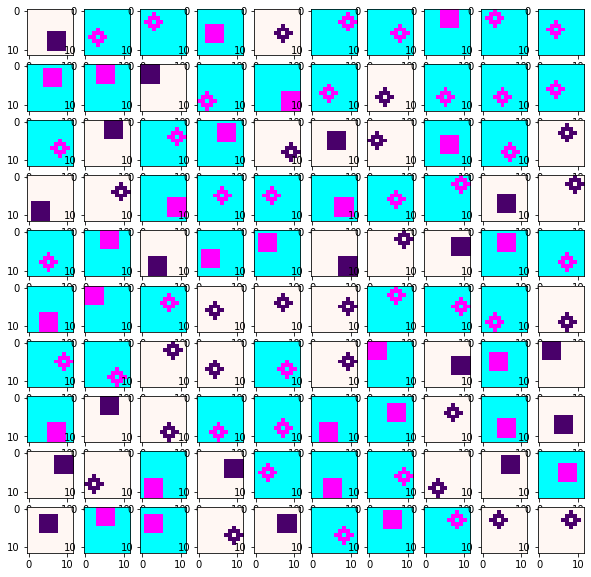

In [238]:
#=========== Test Set visualization ===============
Ne=N-Nt;
Xe=data[Nt:N,:-1];Ye=data[Nt:N,-1];
np.place(Yt, Yt!=1, [0])

plot_tagged_data(10,10,n_row,n_col,Xe,Ye,parameters)

In [239]:
print(np.sum(A2 > 0.5))

588
